Compare the CAMIRA catalogue in the deep region to the GAMA catalogue in the same region.

In [19]:
from astropy.io import fits

gama_path = '/Users/z5214005/Documents/IGL processing Cristina/tables/G3CFoFGroupv10.fits'

hdu = fits.open(gama_path)
gama_tbl = hdu[1].data

# Cull to z <= 0.5
gama_tbl = gama_tbl[gama_tbl['Zfof'] <= 0.5]

gama_tbl

FITS_rec([(100001, 62,  622475, 133.65253049,  0.64257349, 0.10807426, 0.10804438, 0.35033736, 0.5113274 , 0.7235474 ,  8.13362   , 0.9867032, 1., 747.9275  , 748.95123 , 39.146927, -24.464325, 5.13117487e+11, 4.5563584e+13,  622475, 133.65253049,  0.64257349, 1.04071   , 133.6481279 ,  0.6428798 , -1.0631219e+00,  171.09024 ,  7.7318424e-01,  4.8728853e-01,  1.7215486e-01,  1.8275739e-01,  3.3943337e-01, 290, 0.43222725, 0.5597436 , 0.24046338, 4.5563583e+14, 4.0648671e+14, 5.3364222e+11, 5.7077380e+11,   13.453133,   67.206726,  9.8232180e-01,   19.432892,   22.0705 ,    1.0440601,    1.1477361,    2.456856 , 'http://www.gama-survey.org/data/files/GroupFinding/v10/png/100001.png'),
          (100002, 59,  599753, 132.59972403,  0.26011889, 0.19726983, 0.19730976, 0.4750045 , 0.5839326 , 1.59299   , 16.940231  , 1.       , 1., 544.21765 , 545.7531  , 40.909267, -24.840202, 9.05178055e+11, 3.2708112e+13,  599753, 132.59972403,  0.26011889, 0.29419014, 132.60831552,  0.26509178, -1.1801

In [20]:
from astropy.io import ascii

tbl = ascii.read('../../data/processed/camira_final.tbl')[:125]
tbl

ID,Name,RA [deg],Dec [deg],z_cl,Richness,BCG redshift
int64,str17,float64,float64,float64,float64,float64
0,HSCJ021528-044041,33.867663,-4.678112,0.3323,67.112,0.34784
1,HSCJ021634-041821,34.140488,-4.305831,0.1536,25.383,0.13812
2,HSCJ021635-042812,34.145469,-4.470047,0.4549,24.227,0.45234
3,HSCJ021648-043624,34.19852,-4.606752,0.2921,16.67,0.2924
4,HSCJ021834-053802,34.640549,-5.633937,0.352,15.585,0.38257
5,HSCJ021942-045231,34.922934,-4.875215,0.316,24.651,0.33276
6,HSCJ021954-035028,34.974673,-3.841027,0.35,28.804,0.36201
7,HSCJ021956-052803,34.982768,-5.467562,0.26,17.377,0.27847
8,HSCJ022044-032741,35.181886,-3.461483,0.319,28.155,-1.0


In [56]:
# Cross match the two catalogues
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

all_gama_coords = SkyCoord(gama_tbl['IterCenRA'], gama_tbl['IterCenDec'], unit=u.deg)
all_camira_coords = SkyCoord(tbl['RA [deg]'], tbl['Dec [deg]'], unit=u.deg)

# Cull both to overlapping field
cen = SkyCoord(35, -5, unit=u.deg)
camira_coords = all_camira_coords[(all_camira_coords.separation(cen) < 5*u.deg) & (all_camira_coords.dec.deg < -3.55)]
gama_coords = all_gama_coords[all_gama_coords.separation(cen) < 5*u.deg]

camira_ids = np.arange(len(tbl))[(all_camira_coords.separation(cen) < 5*u.deg) & (all_camira_coords.dec.deg < -3.55)]

idx_gama, idx_camira, sep, dist = camira_coords.search_around_sky(gama_coords, 25*u.arcsec)

print(f'{len(idx_gama)} matches made')

15 matches made


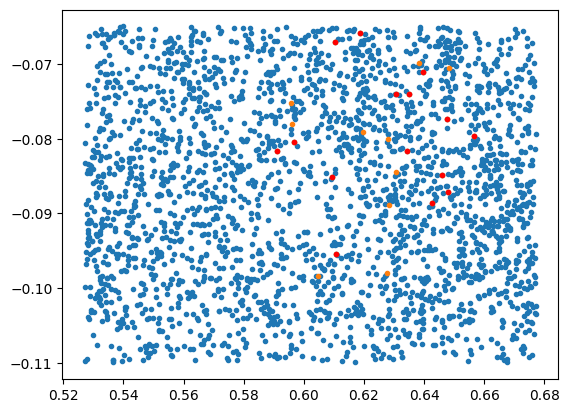

In [54]:
import matplotlib.pyplot as plt
from matplotlib.collections import CircleCollection

# Plot the two catalogues and matches
matched_gama = gama_coords[idx_gama]
matched_camira = camira_coords[idx_camira]

plt.scatter(gama_coords.ra.wrap_at(180*u.deg).radian, gama_coords.dec.radian, marker='.')
plt.scatter(camira_coords.ra.wrap_at(180*u.deg).radian, camira_coords.dec.radian, marker='.')

plt.scatter(matched_camira.ra.wrap_at(180*u.deg).radian, matched_camira.dec.radian, marker='.', color='red')

plt.show()

In [57]:
# Get the unmatched CAMIRA clusters
unmatched = np.setdiff1d(camira_ids, idx_camira)
unmatched

array([ 1,  2,  4,  9, 10, 12, 14, 17, 23, 25, 26])

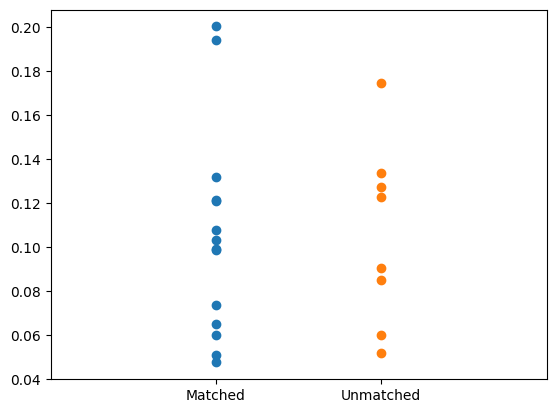

In [63]:
fracs = np.load('../../fracs.npy')

plt.scatter(np.zeros(len(matched_camira)), fracs[2][idx_camira])
plt.scatter(np.ones(len(unmatched)), fracs[2][unmatched])
plt.xticks([0,1], ['Matched', 'Unmatched'])
plt.xlim(-1, 2)
plt.show()

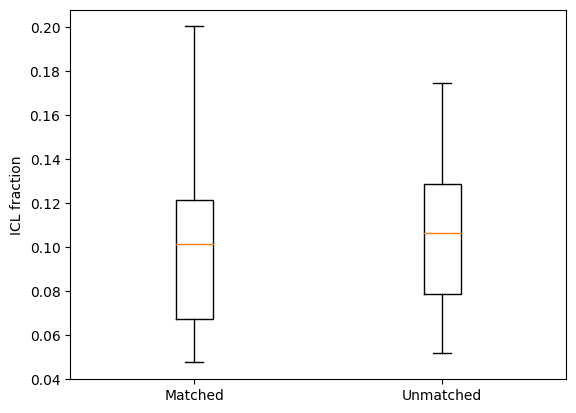

In [72]:
# Turn this into a box plot
matched_fracs = fracs[2][idx_camira]
matched_fracs = matched_fracs[~np.isnan(matched_fracs)]
unmatched_fracs = fracs[2][unmatched]
unmatched_fracs = unmatched_fracs[~np.isnan(unmatched_fracs)]

plt.boxplot([matched_fracs, unmatched_fracs], labels=['Matched', 'Unmatched'])
plt.ylabel('ICL fraction')
plt.show()

In [71]:
fracs[2][11]

0.1916513322406118